In [2]:
import pandas as pd
dataset = pd.read_csv("stroke_data2.csv")
dataset = dataset.sample(frac=1)
dataset.reset_index(drop=True, inplace=True)
dataset

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,94,1,0,1,3,1,194.99,32.8,0,1
1,1,68,1,0,1,3,1,233.29,48.9,0,1
2,1,38,0,0,1,2,1,131.41,28.4,0,1
3,0,42,0,0,1,4,1,96.81,41.2,1,0
4,1,34,0,0,1,2,0,98.92,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
40844,1,70,0,0,0,3,0,56.08,35.9,1,0
40845,0,25,0,0,1,4,1,107.26,38.6,1,1
40846,1,62,0,0,1,4,0,191.66,26.1,1,0
40847,1,18,0,0,1,4,1,72.81,26.3,0,1


In [3]:
from sklearn.preprocessing import StandardScaler

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
x_train = x.iloc[:40000]
y_train = y.iloc[:40000]
x_valid = x.iloc[40039:40839]
y_valid = y.iloc[40039:40839]
x_test = x.iloc[40839:]
y_test = y.iloc[40839:]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [4]:
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
penalties = [None, "l1", "l2"]
compatible = {
    'lbfgs': ['l2', None],
    'liblinear': ['l1', 'l2'],
    'newton-cg': ['l2', None],
    'newton-cholesky': ['l2', None],
    'sag': ['l2', None],
    'saga': ['l1', 'l2', None],
}

In [17]:
from sklearn.linear_model import LogisticRegression
import numpy as np

def evaluate_params(params):
    model = LogisticRegression(**params)
    model.fit(x_train, y_train)
    return model.score(x_valid, y_valid)

possible_c = [0.01, 0.1, 0.5, 1]

score_matrix = np.zeros((len(possible_c), len(solvers), len(penalties)))
score_matrix[:] = np.nan

for ci, c in enumerate(possible_c):
    for si, solver in enumerate(solvers):
        for pi, penalty in enumerate(penalties):
            if penalty in compatible[solver]:
                print(f"Testing c={c} solver={solver} penalty={penalty}")

                params = {"solver":solver, "penalty":penalty}
                if penalty is not None:
                    params["C"] = c
                score = evaluate_params(params)
                score_matrix[ci, si, pi] = score

print("Complete")

Testing c=0.01 solver=lbfgs penalty=None
Testing c=0.01 solver=lbfgs penalty=l2
Testing c=0.01 solver=liblinear penalty=l1
Testing c=0.01 solver=liblinear penalty=l2
Testing c=0.01 solver=newton-cg penalty=None
Testing c=0.01 solver=newton-cg penalty=l2
Testing c=0.01 solver=newton-cholesky penalty=None
Testing c=0.01 solver=newton-cholesky penalty=l2
Testing c=0.01 solver=sag penalty=None
Testing c=0.01 solver=sag penalty=l2
Testing c=0.01 solver=saga penalty=None
Testing c=0.01 solver=saga penalty=l1
Testing c=0.01 solver=saga penalty=l2
Testing c=0.1 solver=lbfgs penalty=None
Testing c=0.1 solver=lbfgs penalty=l2
Testing c=0.1 solver=liblinear penalty=l1
Testing c=0.1 solver=liblinear penalty=l2
Testing c=0.1 solver=newton-cg penalty=None
Testing c=0.1 solver=newton-cg penalty=l2
Testing c=0.1 solver=newton-cholesky penalty=None
Testing c=0.1 solver=newton-cholesky penalty=l2
Testing c=0.1 solver=sag penalty=None
Testing c=0.1 solver=sag penalty=l2
Testing c=0.1 solver=saga penalty=

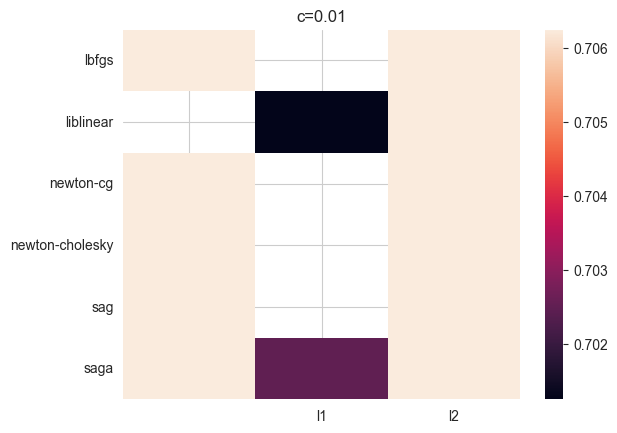

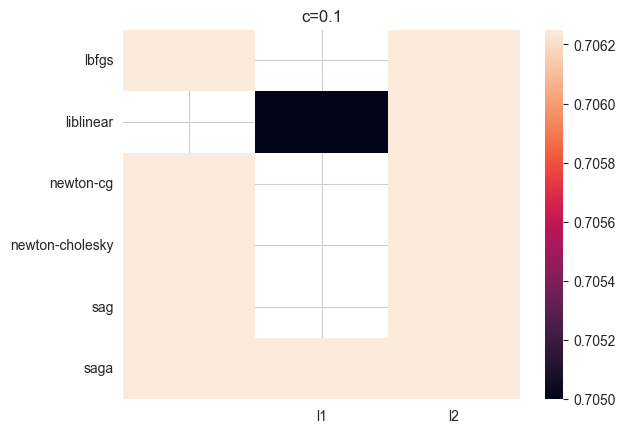

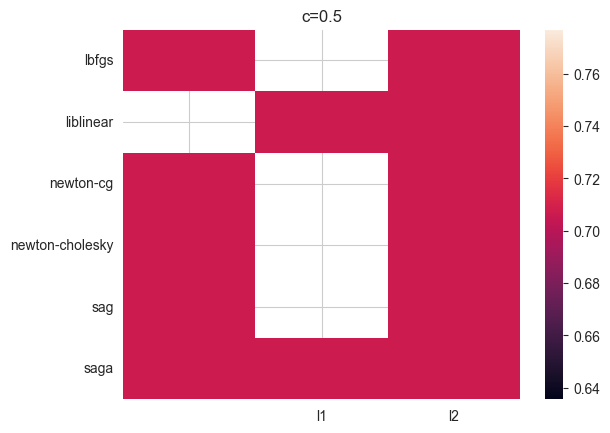

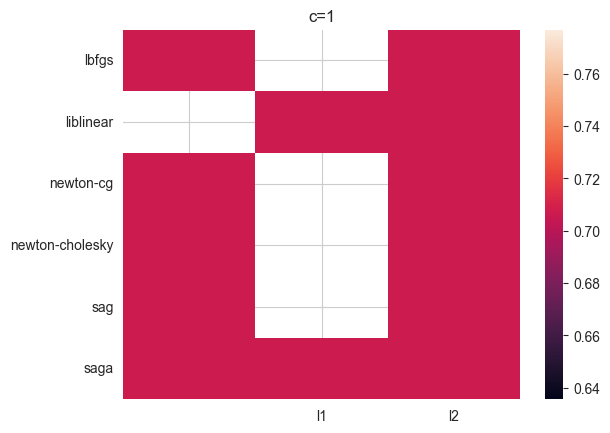

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

for i in range(len(possible_c)):
    sns.heatmap(score_matrix[i, :, :], xticklabels=penalties, yticklabels=solvers).set_title(f"c={possible_c[i]}")
    plt.show()


0.70625

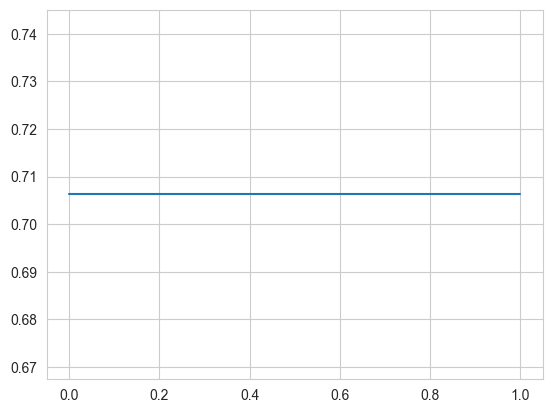

In [16]:
elasticnet_params = {"penalty": "elasticnet", "solver": "saga"}
ratios = np.linspace(0, 1)

scores = np.zeros(len(ratios))
for index, ratio in enumerate(ratios):
    temp = elasticnet_params.copy()
    temp["l1_ratio"] = ratio
    scores[index] = evaluate_params(temp)

sns.lineplot(x=ratios, y=scores)
scores[0]

0.70625

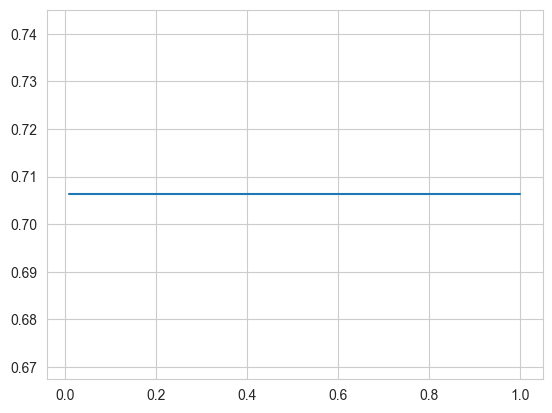

In [42]:
elasticnet_params = {"penalty": "l2", "solver": "lbfgs", "max_iter": 100000000, "tol": 1e-10}
c_vals = np.linspace(0.01, 1, num=10)

scores = np.zeros(len(c_vals))
for index, c_val in enumerate(c_vals):
    temp = elasticnet_params.copy()
    temp["C"] = c_val
    scores[index] = evaluate_params(temp)

sns.lineplot(x=c_vals, y=scores)
scores[0]